# Introduction
On this project I will focus on data visualization from the created csv files about disneyland reviews, focusing on review rating and reviewer location.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from csv import writer
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2 # country code generater
from geopy.geocoders import Nominatim # getting latitude and longitude, can be also used to generate country names from places
import folium # map drawing
from folium.plugins import MarkerCluster # adding to map

### 1. Disneyland Tokyo

In [2]:
# import csv file and show if it's looking good
# keep_default_na=False is included as N/A values will be read as NaN if not
TK = pd.read_csv("Disneyland_Tokyo_Reviews.csv", keep_default_na=False)
TK.head()

,Review #,Rating,Year/Month,Reviewer Location,Review Title,Review Text
0,1,5,22-Apr,Ukraine,Wonderful,"Wonderful! Even though It was rainy Sunday, th..."
1,2,5,21-May,Australia,Amazing!!!,My family & I visited Disney Sea in April 2019...
2,3,5,21-Mar,United Arab Emirates,Tokyo,Great place to spend time with young children....
3,4,2,21-Dec,Japan,Very little COVID measures,"When we got there, there was a huge line witho..."
4,5,3,21-Dec,N/A,Not what it used to be...,Nowhere what it used to be. Have been going f...


#### 1.1 Disneyland Tokyo Ratings

In [3]:
# save rating as a separate variable and check
TK_rate = TK["Rating"]
TK_rate.head()
type(TK_rate[2])

numpy.int64

As rating values were initially strings, they will be converted to ints (They may appear to be ints if this runs again)

In [4]:
for i in range (0, 3241):
    location = TK["Rating"][i]
    location = int(float(location))
    TK.loc[i, "Rating"] = location
    TK.to_csv("Disneyland_Tokyo_Reviews.csv", index = False)

In [5]:
# check if the values are converted into ints
TK_rate = TK["Rating"]
print(type(TK_rate[2]))

<class 'numpy.int64'>


A bar will be created along with percentage values for the rating. 

In [6]:
# Create an array that holds the count of each rating
TK_rate_count = np.array([])
print("Original:",TK_rate_count)
for i in range(1,6):
    count = TK_rate.value_counts()[i]
    TK_rate_count = np.append(TK_rate_count, np.array([count]))
print("Now:",TK_rate_count)

Original: []
Now: [ 135.  130.  308.  872. 1796.]


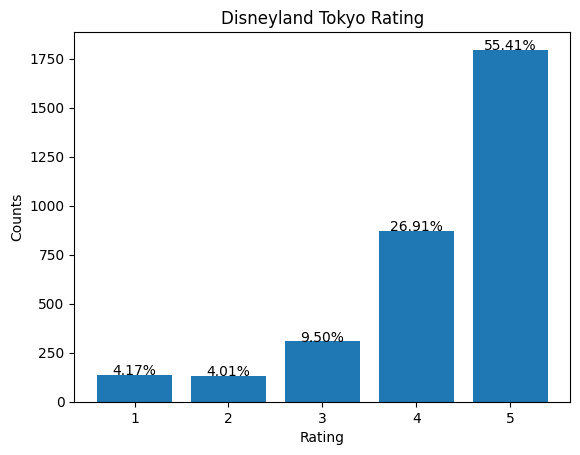

In [7]:
# Plotting in bars with percentage
TK_total_rating = len(TK_rate)
fig, ax = plt.subplots()
width = 0.8
rating_x = np.array([1,2,3,4,5])
TK_bar = ax.bar(rating_x, TK_rate_count, width=width)
ax.set_xlabel("Rating")
ax.set_ylabel("Counts")
ax.set_title("Disneyland Tokyo Rating")
for p in TK_bar:
    height = p.get_height()
    height_percent = format((height)*100/TK_total_rating, ".2f")
    ax.text(p.get_x()+ p.get_width() / 2, height+.10, "{}%".format(height_percent), ha="center")

#### 1.2 Disneyland Tokyo Reviewer Location

In the csv file, there is a column dedicated to reviewer location. The location values were converted into country names and stored. 

In [8]:
# Make a variable and check
TK_location = TK["Reviewer Location"]
TK_location.head()

0                 Ukraine
1               Australia
2    United Arab Emirates
3                   Japan
4                     N/A
Name: Reviewer Location, dtype: object

The locations will be changed into a list to create a list with unique country names.

In [9]:
# create list of everything
TK_countries_list = TK_location.tolist()

# define a function that would create a list with unique values from the list
def unique(list_):
    unique_list = []
    for i in list_:
        if i not in unique_list:
            unique_list.append(i)
    return unique_list

# check if it's working
TK_countries = unique(TK_countries_list)
print(TK_countries)

['Ukraine', 'Australia', 'United Arab Emirates', 'Japan', 'N/A', 'Pakistan', 'Philippines', 'China', 'United States', 'Malaysia', 'Singapore', 'Poland', 'France', 'United Kingdom', 'Netherlands', 'Indonesia', 'Thailand', 'Canada', 'India', 'New Zealand', 'Brunei', 'Qatar', 'Switzerland', 'South Korea', 'Sri Lanka', 'Colombia', 'El Salvador', 'Nepal', 'Vietnam', 'Germany', 'Iran', 'Saudi Arabia', 'Cambodia', 'Russia', 'Norway', 'Mongolia', 'Jamaica', 'Sweden', 'Portugal', 'Egypt', 'Mexico', 'Ireland', 'Taiwan', 'Denmark', 'Lebanon', 'Uruguay', 'Afghanistan', 'Turkey', 'Greece', 'South Africa', 'Seychelles', 'Spain', 'Italy', 'Luxembourg', 'Austria', 'Myanmar', 'Kuwait', 'Brazil', 'Bangladesh', 'Bahrain', 'Iceland', 'Costa Rica', 'Finland', 'Falkland Islands', 'Croatia', 'Jordan', 'Bhutan', 'Federated States of Micronesia', 'Argentina', 'Czechia', 'Romania', 'Israel', 'Yemen', 'Hungary', 'Belgium', 'Cyprus', 'Fiji', 'Estonia', 'Papua New Guinea', 'Libya', 'Mauritius', 'Bosnia and Herzego

Now we can count the number of overlapping values in the original list.

In [12]:
TK_countries_count = []
for i in TK_countries:
    count = TK_countries_list.count(i)
    TK_countries_count.append(count)
print(TK_countries_count)

[1, 711, 27, 127, 446, 5, 122, 49, 408, 169, 297, 3, 12, 220, 15, 145, 55, 56, 56, 63, 6, 5, 8, 12, 5, 3, 1, 1, 12, 10, 4, 8, 5, 4, 6, 1, 1, 11, 3, 3, 4, 7, 25, 7, 1, 1, 1, 5, 2, 4, 1, 12, 5, 1, 3, 4, 4, 9, 2, 5, 2, 2, 5, 1, 2, 1, 1, 1, 4, 2, 2, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Will create a new dataframe to save country names and count

In [14]:
TK_df = pd.DataFrame({"Country": TK_countries})
TK_df["Count"] = TK_countries_count
print(TK_df)

                   Country
0                  Ukraine
1                Australia
2     United Arab Emirates
3                    Japan
4                      N/A
..                     ...
81  Bosnia and Herzegovina
82                  Panama
83                 Namibia
84                   Malta
85                 Bolivia

[86 rows x 1 columns]


Will use pycountry-convert to add country and continent codes to the df, ultimately to add longitude, latitude

In [16]:
# check imported functions are working
test = country_name_to_country_alpha2("United States")
print(test)
test = country_alpha2_to_continent_code(test)
print(test)

US
NA


In [17]:
def get_continent(x):
    try:
        cn_a2_code = country_name_to_country_alpha2(x)
    except:
        cn_a2_code = "Unknown"
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = "Unknown"
    return (cn_a2_code, cn_continent)

In [18]:
# create a list to store country/continent code
TK_code_list = []
for i in TK_countries:
    code = get_continent(i)
    TK_code_list.append(code)
print(TK_code_list)

[('UA', 'EU'), ('AU', 'OC'), ('AE', 'AS'), ('JP', 'AS'), ('Unknown', 'Unknown'), ('PK', 'AS'), ('PH', 'AS'), ('CN', 'AS'), ('US', 'NA'), ('MY', 'AS'), ('SG', 'AS'), ('PL', 'EU'), ('FR', 'EU'), ('GB', 'EU'), ('NL', 'EU'), ('ID', 'AS'), ('TH', 'AS'), ('CA', 'NA'), ('IN', 'AS'), ('NZ', 'OC'), ('BN', 'AS'), ('QA', 'AS'), ('CH', 'EU'), ('KR', 'AS'), ('LK', 'AS'), ('CO', 'SA'), ('SV', 'NA'), ('NP', 'AS'), ('VN', 'AS'), ('DE', 'EU'), ('IR', 'AS'), ('SA', 'AS'), ('KH', 'AS'), ('RU', 'EU'), ('NO', 'EU'), ('MN', 'AS'), ('JM', 'NA'), ('SE', 'EU'), ('PT', 'EU'), ('EG', 'AF'), ('MX', 'NA'), ('IE', 'EU'), ('TW', 'AS'), ('DK', 'EU'), ('LB', 'AS'), ('UY', 'SA'), ('AF', 'AS'), ('TR', 'AS'), ('GR', 'EU'), ('ZA', 'AF'), ('SC', 'AF'), ('ES', 'EU'), ('IT', 'EU'), ('LU', 'EU'), ('AT', 'EU'), ('MM', 'AS'), ('KW', 'AS'), ('BR', 'SA'), ('BD', 'AS'), ('BH', 'AS'), ('IS', 'EU'), ('CR', 'NA'), ('FI', 'EU'), ('FK', 'SA'), ('HR', 'EU'), ('JO', 'AS'), ('BT', 'AS'), ('FM', 'OC'), ('AR', 'SA'), ('CZ', 'EU'), ('RO', 'E

In [20]:
# Add to df
TK_df["codes"] = TK_code_list
TK_df.head()

,Country,Count,codes
0,Ukraine,1,"(UA, EU)"
1,Australia,711,"(AU, OC)"
2,United Arab Emirates,27,"(AE, AS)"
3,Japan,127,"(JP, AS)"
4,N/A,446,"(Unknown, Unknown)"


In [21]:
# create function to find latitude and longitude
geolocator = Nominatim(user_agent = "geoapiExercises")
def geolocate(con):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(con)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return (np.nan, np.nan)
geolocate(TK_code_list[0])

(48.5972757, 22.3232606)

In [31]:
# create list for latitude and longitude
TK_lat = []
TK_long = []
for i in TK_countries:
    lat, long = geolocate(i)
    TK_lat.append(lat)
    TK_long.append(long)
print(TK_lat)
print(TK_long)

[49.4871968, -24.7761086, 24.0002488, 36.5748441, 41.45630775, 30.3308401, 12.7503486, 35.000074, 39.7837304, 4.5693754, 1.357107, 52.215933, 46.603354, 54.7023545, 52.2434979, -2.4833826, 14.8971921, 61.0666922, 22.3511148, -41.5000831, 4.4137155, 25.3336984, 46.7985624, 36.638392, 7.5554942, 4.099917, 13.8000382, 28.1083929, 15.9266657, 51.1638175, 32.6475314, 25.6242618, 12.5433216, 64.6863136, 60.5000209, 46.8250388, 18.1850507, 59.6749712, 39.6621648, 26.2540493, 23.6585116, 52.865196, 23.9739374, 55.670249, 33.8750629, -32.8755548, 33.7680065, 38.9597594, 38.9953683, -28.8166236, -4.6574977, 39.3260685, 42.6384261, 49.8158683, 47.59397, 17.1750495, 29.2733964, -10.3333333, 24.4769288, 26.1551249, 64.9841821, 10.2735633, 63.2467777, -51.9492937, 45.5643442, 31.1667049, 27.549511, 8.6062347, -34.9964963, 49.7439047, 45.9852129, 30.8124247, 16.3471243, 47.1817585, 50.6402809, 34.9823018, -18.1239696, 58.7523778, -5.6816069, 26.8234472, -20.2759451, 44.3053476, 8.559559, -23.2335499,

In [33]:
# add to df
TK_df["Latitude"] = TK_lat
TK_df["Longitude"] = TK_long
TK_df.head(50)

,Country,Count,codes,Latitude,Longitude
0,Ukraine,1,"(UA, EU)",49.487197,31.271832
1,Australia,711,"(AU, OC)",-24.776109,134.755000
2,United Arab Emirates,27,"(AE, AS)",24.000249,53.999483
3,Japan,127,"(JP, AS)",36.574844,139.239418
4,N/A,446,"(Unknown, Unknown)",41.456308,-7.538746
5,Pakistan,5,"(PK, AS)",30.330840,71.247499
6,Philippines,122,"(PH, AS)",12.750349,122.731210
7,China,49,"(CN, AS)",35.000074,104.999927
8,United States,408,"(US, NA)",39.783730,-100.445882
9,Malaysia,169,"(MY, AS)",4.569375,102.265682


The N/A values will put to latitude and longitude of 0, 0 for convinence

In [35]:
TK_df.iloc[4, TK_df.columns.get_loc("Latitude")] = 0
TK_df.iloc[4, TK_df.columns.get_loc("Longitude")] = 0
TK_df.head()

,Country,Count,codes,Latitude,Longitude
0,Ukraine,1,"(UA, EU)",49.487197,31.271832
1,Australia,711,"(AU, OC)",-24.776109,134.755000
2,United Arab Emirates,27,"(AE, AS)",24.000249,53.999483
3,Japan,127,"(JP, AS)",36.574844,139.239418
4,N/A,446,"(Unknown, Unknown)",0.000000,0.000000


Now a world map will be drawn and the counts will be plotted to the map

In [38]:
# create world map
TK_world_map = folium.Map(titles = "cartodbpositron")
TK_marker_cluster = MarkerCluster().add_to(TK_world_map)
for i in range(len(TK_df)):
    lat = TK_df.iloc[i]["Latitude"]
    long = TK_df.iloc[i]["Longitude"]
    radius = 10
    popup_text = """Country: {}<br>Count: {}<br>"""
    popup_text = popup_text.format(TK_df.iloc[i]["Country"], TK_df.iloc[i]["Count"])
    folium.CircleMarker(location = [lat, long], radius = radius, popup = popup_text, fill = True).add_to(TK_marker_cluster)

Draw world map

In [140]:
TK_world_map

### 2. Disneyland Paris

The same step from Disneyland Tokyo will be repeated.

In [46]:
# import csv file and show if it's looking good
# keep_default_na=False is included as N/A values will be read as NaN if not
Paris = pd.read_csv("Disneyland_Paris_Reviews.csv", keep_default_na=False)
Paris.head()

,Review #,Rating,Year/Month,Reviewer Location,Review Title,Review Text
0,1,1,22-Oct,United Kingdom,"Awful customer service, where has the magic gone",Just had an awful experience with customer ser...
1,2,2,22-Oct,United Kingdom,What a difference a few years has made,Wow what a difference since our last visit bef...
2,3,4,22-Sep,Greece,💫A MAGICAL EXPERIENCE💫,As a Disney fan the experience was great.We re...
3,4,2,22-Aug,United Kingdom,Magical Disney. But so expensive for average,We stayed at the Newport Bay Hotel in August f...
4,5,4,N/A,N/A,Great experience,"Fun! Recommend going for more than one day, bu..."


#### 2.1 Disneyland Paris Ratings

In [47]:
# save rating as a separate variable and check
Paris_rate = Paris["Rating"]
Paris_rate.head()
print(type(Paris_rate[2]))

<class 'numpy.int64'>


In [48]:
for i in range (len(Paris)):
    location = Paris["Rating"][i]
    location = int(float(location))
    Paris.loc[i, "Rating"] = location
    Paris.to_csv("Disneyland_Paris_Reviews.csv", index = False)

In [49]:
# check if the values are converted into ints
Paris_rate = Paris["Rating"]
print(type(Paris_rate[2]))

<class 'numpy.int64'>


In [50]:
# Create an array that holds the count of each rating
Paris_rate_count = np.array([])
print("Original:",Paris_rate_count)
for i in range(1,6):
    count = Paris_rate.value_counts()[i]
    Paris_rate_count = np.append(Paris_rate_count, np.array([count]))
print("Now:",Paris_rate_count)

Original: []
Now: [1392. 1493. 2744. 4579. 8199.]


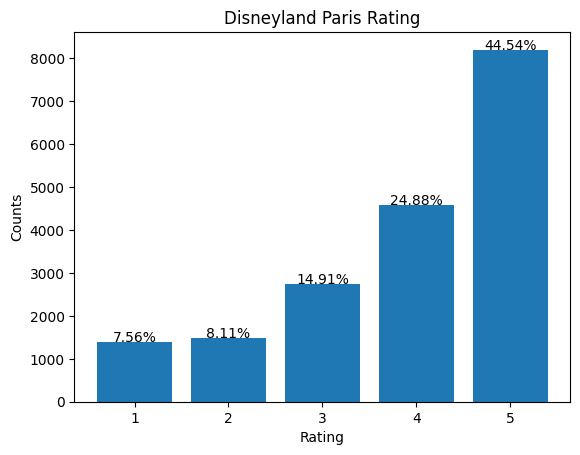

In [51]:
# Plotting in bars with percentage
Paris_total_rating = len(Paris_rate)
fig, ax = plt.subplots()
width = 0.8
rating_x = np.array([1,2,3,4,5])
Paris_bar = ax.bar(rating_x, Paris_rate_count, width=width)
ax.set_xlabel("Rating")
ax.set_ylabel("Counts")
ax.set_title("Disneyland Paris Rating")
for p in Paris_bar:
    height = p.get_height()
    height_percent = format((height)*100/Paris_total_rating, ".2f")
    ax.text(p.get_x()+ p.get_width() / 2, height+.10, "{}%".format(height_percent), ha="center")

#### 2.2 Disneyland Paris Reviewer Location

In [52]:
# Make a variable and check
Paris_location = Paris["Reviewer Location"]
Paris_location.head()

0    United Kingdom
1    United Kingdom
2            Greece
3    United Kingdom
4               N/A
Name: Reviewer Location, dtype: object

In [53]:
# create list of everything
Paris_countries_list = Paris_location.tolist()
Paris_countries = unique(Paris_countries_list)
print(Paris_countries)

['United Kingdom', 'Greece', 'N/A', 'Canada', 'Norway', 'Mexico', 'Israel', 'United States', 'Ireland', 'Iran', 'Spain', 'Australia', 'New Zealand', 'India', 'Malta', 'Netherlands', 'Laos', 'Portugal', 'Nigeria', 'Brazil', 'Guernsey', 'Cyprus', 'Turks and Caicos Islands', 'Romania', 'Germany', 'United Arab Emirates', 'Belgium', 'South Africa', 'Denmark', 'Sweden', 'Italy', 'Austria', 'Bahrain', 'Saudi Arabia', 'Albania', 'France', 'Switzerland', 'Bulgaria', 'Latvia', 'Kuwait', 'Poland', 'Russia', 'Singapore', 'Czechia', 'Montenegro', 'Finland', 'Bosnia and Herzegovina', 'Hungary', 'Sri Lanka', 'Uruguay', 'Luxembourg', 'Iceland', 'Ukraine', 'Philippines', 'Georgia', 'Malaysia', 'Slovakia', 'Qatar', 'Taiwan', 'Thailand', 'Morocco', 'Indonesia', 'Gibraltar', 'Egypt', 'Serbia', 'Argentina', 'Cameroon', 'Suriname', 'Oman', 'Turkey', 'Lebanon', 'Slovenia', 'Jordan', 'Croatia', 'British Virgin Islands', 'Faroe Islands', 'North Macedonia', 'Pakistan', 'Lithuania', 'China', 'Mali', 'Peru', 'Jap

In [54]:
Paris_countries_count = []
for i in Paris_countries:
    count = Paris_countries_list.count(i)
    Paris_countries_count.append(count)
print(Paris_countries_count)

[9496, 121, 2406, 232, 75, 15, 68, 1309, 580, 25, 144, 691, 80, 341, 62, 233, 2, 118, 17, 57, 9, 51, 1, 91, 164, 130, 144, 106, 61, 71, 93, 27, 22, 58, 7, 241, 103, 16, 6, 26, 19, 25, 100, 26, 5, 40, 8, 23, 16, 3, 18, 5, 5, 31, 4, 56, 10, 27, 1, 22, 4, 43, 8, 57, 11, 12, 1, 2, 11, 48, 54, 5, 8, 17, 1, 1, 8, 10, 3, 32, 2, 4, 7, 6, 1, 1, 12, 1, 2, 1, 3, 5, 1, 4, 2, 3, 4, 4, 1, 2, 2, 2, 11, 2, 2, 3, 2, 2, 4, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1]


In [62]:
Paris_df = pd.DataFrame({"Country": Paris_countries})
Paris_df["Count"] = Paris_countries_count
print(Paris_df)

            Country  Count
0    United Kingdom   9496
1            Greece    121
2               N/A   2406
3            Canada    232
4            Norway     75
..              ...    ...
129         Somalia      1
130     South Korea      2
131        Honduras      1
132         Andorra      1
133          Jersey      1

[134 rows x 2 columns]


In [63]:
# create a list to store country/continent code
Paris_code_list = []
for i in Paris_countries:
    code = get_continent(i)
    Paris_code_list.append(code)
print(Paris_code_list)

[('GB', 'EU'), ('GR', 'EU'), ('Unknown', 'Unknown'), ('CA', 'NA'), ('NO', 'EU'), ('MX', 'NA'), ('IL', 'AS'), ('US', 'NA'), ('IE', 'EU'), ('IR', 'AS'), ('ES', 'EU'), ('AU', 'OC'), ('NZ', 'OC'), ('IN', 'AS'), ('MT', 'EU'), ('NL', 'EU'), ('LA', 'AS'), ('PT', 'EU'), ('NG', 'AF'), ('BR', 'SA'), ('GG', 'EU'), ('CY', 'AS'), ('TC', 'NA'), ('RO', 'EU'), ('DE', 'EU'), ('AE', 'AS'), ('BE', 'EU'), ('ZA', 'AF'), ('DK', 'EU'), ('SE', 'EU'), ('IT', 'EU'), ('AT', 'EU'), ('BH', 'AS'), ('SA', 'AS'), ('AL', 'EU'), ('FR', 'EU'), ('CH', 'EU'), ('BG', 'EU'), ('LV', 'EU'), ('KW', 'AS'), ('PL', 'EU'), ('RU', 'EU'), ('SG', 'AS'), ('CZ', 'EU'), ('ME', 'EU'), ('FI', 'EU'), ('BA', 'EU'), ('HU', 'EU'), ('LK', 'AS'), ('UY', 'SA'), ('LU', 'EU'), ('IS', 'EU'), ('UA', 'EU'), ('PH', 'AS'), ('GE', 'AS'), ('MY', 'AS'), ('SK', 'EU'), ('QA', 'AS'), ('TW', 'AS'), ('TH', 'AS'), ('MA', 'AF'), ('ID', 'AS'), ('GI', 'EU'), ('EG', 'AF'), ('RS', 'EU'), ('AR', 'SA'), ('CM', 'AF'), ('SR', 'SA'), ('OM', 'AS'), ('TR', 'AS'), ('LB', 'A

In [64]:
# Add to df
Paris_df["codes"] = Paris_code_list
Paris_df.head()

,Country,Count,codes
0,United Kingdom,9496,"(GB, EU)"
1,Greece,121,"(GR, EU)"
2,N/A,2406,"(Unknown, Unknown)"
3,Canada,232,"(CA, NA)"
4,Norway,75,"(NO, EU)"


In [65]:
# create list for latitude and longitude
Paris_lat = []
Paris_long = []
for i in Paris_countries:
    lat, long = geolocate(i)
    Paris_lat.append(lat)
    Paris_long.append(long)
print(Paris_lat)
print(Paris_long)

[54.7023545, 38.9953683, 41.45630775, 61.0666922, 60.5000209, 23.6585116, 30.8124247, 39.7837304, 52.865196, 32.6475314, 39.3260685, -24.7761086, -41.5000831, 22.3511148, 35.8885993, 52.2434979, 20.0171109, 39.6621648, 9.6000359, -10.3333333, 49.4566233, 34.9823018, 21.721746, 45.9852129, 51.1638175, 24.0002488, 50.6402809, -28.8166236, 55.670249, 59.6749712, 42.6384261, 47.59397, 26.1551249, 25.6242618, 41.000028, 46.603354, 46.7985624, 42.6073975, 56.8406494, 29.2733964, 52.215933, 64.6863136, 1.357107, 49.7439047, 42.9868853, 63.2467777, 44.3053476, 47.1817585, 7.5554942, -32.8755548, 49.8158683, 64.9841821, 49.4871968, 12.7503486, 32.3293809, 4.5693754, 48.7411522, 25.3336984, 23.9739374, 14.8971921, 31.1728205, -2.4833826, 36.1285933, 26.2540493, 44.1534121, -34.9964963, 4.6125522, 4.1413025, 21.0000287, 38.9597594, 33.8750629, 45.8133113, 31.1667049, 45.5643442, 18.4024395, 62.0448724, 41.6171214, 30.3308401, 55.3500003, 35.000074, 16.3700359, -6.8699697, 36.5748441, 1.4419683, 1

In [66]:
# add to df
Paris_df["Latitude"] = Paris_lat
Paris_df["Longitude"] = Paris_long
Paris_df.head(50)

,Country,Count,codes,Latitude,Longitude
0,United Kingdom,9496,"(GB, EU)",54.702354,-3.276575
1,Greece,121,"(GR, EU)",38.995368,21.987713
2,N/A,2406,"(Unknown, Unknown)",41.456308,-7.538746
3,Canada,232,"(CA, NA)",61.066692,-107.991707
4,Norway,75,"(NO, EU)",60.500021,9.099972
5,Mexico,15,"(MX, NA)",23.658512,-102.007710
6,Israel,68,"(IL, AS)",30.812425,34.859476
7,United States,1309,"(US, NA)",39.783730,-100.445882
8,Ireland,580,"(IE, EU)",52.865196,-7.979460
9,Iran,25,"(IR, AS)",32.647531,54.564352


In [67]:
Paris_df.iloc[2, Paris_df.columns.get_loc("Latitude")] = 0
Paris_df.iloc[2, Paris_df.columns.get_loc("Longitude")] = 0
Paris_df.head()

,Country,Count,codes,Latitude,Longitude
0,United Kingdom,9496,"(GB, EU)",54.702354,-3.276575
1,Greece,121,"(GR, EU)",38.995368,21.987713
2,N/A,2406,"(Unknown, Unknown)",0.000000,0.000000
3,Canada,232,"(CA, NA)",61.066692,-107.991707
4,Norway,75,"(NO, EU)",60.500021,9.099972


In [68]:
# create world map
Paris_world_map = folium.Map(titles = "cartodbpositron")
Paris_marker_cluster = MarkerCluster().add_to(Paris_world_map)
for i in range(len(Paris_df)):
    lat = Paris_df.iloc[i]["Latitude"]
    long = Paris_df.iloc[i]["Longitude"]
    radius = 10
    popup_text = """Country: {}<br>Count: {}<br>"""
    popup_text = popup_text.format(Paris_df.iloc[i]["Country"], Paris_df.iloc[i]["Count"])
    folium.CircleMarker(location = [lat, long], radius = radius, popup = popup_text, fill = True).add_to(Paris_marker_cluster)

In [139]:
Paris_world_map

### 3. Hong Kong Disneyland

In [70]:
# import csv file and show if it's looking good
# keep_default_na=False is included as N/A values will be read as NaN if not
HK = pd.read_csv("Disneyland_HongKong_Reviews.csv", keep_default_na=False)
HK.head()

,Review #,Rating,Year/Month,Reviewer Location,Review Title,Review Text
0,1,4,21-Nov,N/A,Spooky season,We visited Disneyland in October 2021. It was ...
1,2,1,22-Sep,Netherlands,Ticket sales not customer friendly,"As a customer friendly franchise, how can you ..."
2,3,1,22-Sep,N/A,What a poor arrangment,The night show was cancelled and then said to ...
3,4,1,22-Sep,N/A,Disney Broke my Heart twice in 30mins,We went there for the momentus light and firew...
4,5,5,22-Aug,China,Celebration for my daughter’s birthday,I came here with my wife and daughter to celeb...


#### 3.1 Hong Kong Disneyland Ratings

In [71]:
# save rating as a separate variable and check
HK_rate = HK["Rating"]
HK_rate.head()
print(type(HK_rate[2]))

<class 'numpy.int64'>


In [73]:
for i in range (len(HK)):
    location = HK["Rating"][i]
    location = int(float(location))
    HK.loc[i, "Rating"] = location
HK.to_csv("Disneyland_HongKong_Reviews.csv", index = False)

In [78]:
# check if the values are converted into ints
HK_rate = HK["Rating"]
print(type(HK_rate[1000]))

<class 'numpy.int64'>


In [79]:
# Create an array that holds the count of each rating
HK_rate_count = np.array([])
print("Original:",HK_rate_count)
for i in range(1,6):
    count = HK_rate.value_counts()[i]
    HK_rate_count = np.append(HK_rate_count, np.array([count]))
print("Now:",HK_rate_count)

Original: []
Now: [ 249.  432. 1703. 4059. 5887.]


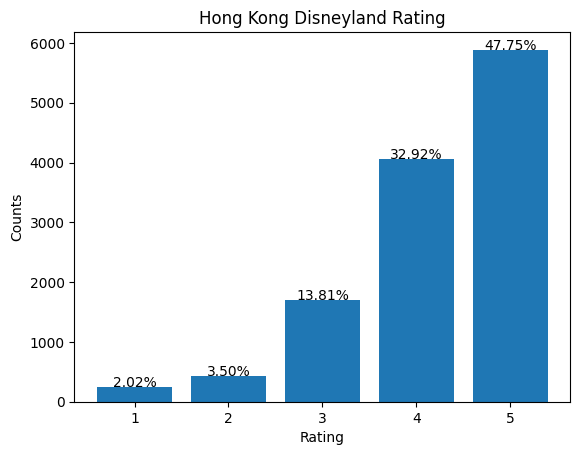

In [81]:
# Plotting in bars with percentage
HK_total_rating = len(HK_rate)
fig, ax = plt.subplots()
width = 0.8
rating_x = np.array([1,2,3,4,5])
HK_bar = ax.bar(rating_x, HK_rate_count, width=width)
ax.set_xlabel("Rating")
ax.set_ylabel("Counts")
ax.set_title("Hong Kong Disneyland Rating")
for p in HK_bar:
    height = p.get_height()
    height_percent = format((height)*100/HK_total_rating, ".2f")
    ax.text(p.get_x()+ p.get_width() / 2, height+.10, "{}%".format(height_percent), ha="center")

#### 3.2 Hong Kong Disneyland Reviewer Location

In [82]:
# Make a variable and check
HK_location = HK["Reviewer Location"]
HK_location.head()

0            N/A
1    Netherlands
2            N/A
3            N/A
4          China
Name: Reviewer Location, dtype: object

In [83]:
# create list of everything
HK_countries_list = HK_location.tolist()
HK_countries = unique(HK_countries_list)
print(HK_countries)

['N/A', 'Netherlands', 'China', 'Belgium', 'United Kingdom', 'Brazil', 'South Korea', 'Australia', 'Canada', 'Ireland', 'Philippines', 'Spain', 'Indonesia', 'South Africa', 'India', 'Singapore', 'United States', 'Japan', 'New Zealand', 'Namibia', 'Italy', 'Taiwan', 'France', 'United Arab Emirates', 'Switzerland', 'Saudi Arabia', 'Malaysia', 'Qatar', 'Cambodia', 'Pakistan', 'Serbia', 'Finland', 'Afghanistan', 'Mauritius', 'Denmark', 'Ukraine', 'Norway', 'Russia', 'Germany', 'Israel', 'Kuwait', 'Sweden', 'Vatican City', 'Bahrain', 'Thailand', 'Mexico', 'Fiji', 'Myanmar', 'Vietnam', 'Sri Lanka', 'Uganda', 'Austria', 'Czechia', 'Vanuatu', 'Turkey', 'Egypt', 'Kenya', 'Luxembourg', 'Portugal', 'Zambia', 'Croatia', 'Georgia', 'Oman', 'Colombia', 'Barbados', 'Bosnia and Herzegovina', 'Brunei', 'Maldives', 'Romania', 'Cyprus', 'Chile', 'Greece', 'Estonia', "Côte d'Ivoire", 'Bangladesh', 'Jordan', 'Botswana', 'Nigeria', 'Argentina', 'Peru', 'Paraguay', 'Iceland', 'Iran', 'Mali', 'Uruguay', 'Mong

In [84]:
HK_countries_count = []
for i in HK_countries:
    count = HK_countries_list.count(i)
    HK_countries_count.append(count)
print(HK_countries_count)

[1628, 51, 747, 9, 860, 12, 26, 1817, 233, 28, 1108, 32, 524, 156, 1199, 945, 950, 42, 191, 1, 28, 30, 33, 227, 25, 53, 546, 42, 10, 15, 2, 29, 3, 21, 10, 4, 21, 16, 43, 19, 23, 29, 1, 21, 198, 7, 5, 5, 47, 20, 1, 8, 6, 2, 7, 17, 12, 3, 9, 2, 2, 1, 19, 3, 1, 1, 17, 5, 6, 3, 5, 10, 8, 2, 9, 3, 2, 6, 6, 3, 1, 1, 5, 1, 1, 3, 1, 3, 3, 6, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2]


In [85]:
HK_df = pd.DataFrame({"Country": HK_countries})
HK_df["Count"] = HK_countries_count
print(HK_df)

            Country  Count
0               N/A   1628
1       Netherlands     51
2             China    747
3           Belgium      9
4    United Kingdom    860
..              ...    ...
109           Malta      1
110       Gibraltar      1
111      East Timor      1
112         Hungary      2
113        Tanzania      2

[114 rows x 2 columns]


In [86]:
# create a list to store country/continent code
HK_code_list = []
for i in HK_countries:
    code = get_continent(i)
    HK_code_list.append(code)
print(HK_code_list)

[('Unknown', 'Unknown'), ('NL', 'EU'), ('CN', 'AS'), ('BE', 'EU'), ('GB', 'EU'), ('BR', 'SA'), ('KR', 'AS'), ('AU', 'OC'), ('CA', 'NA'), ('IE', 'EU'), ('PH', 'AS'), ('ES', 'EU'), ('ID', 'AS'), ('ZA', 'AF'), ('IN', 'AS'), ('SG', 'AS'), ('US', 'NA'), ('JP', 'AS'), ('NZ', 'OC'), ('NA', 'AF'), ('IT', 'EU'), ('TW', 'AS'), ('FR', 'EU'), ('AE', 'AS'), ('CH', 'EU'), ('SA', 'AS'), ('MY', 'AS'), ('QA', 'AS'), ('KH', 'AS'), ('PK', 'AS'), ('RS', 'EU'), ('FI', 'EU'), ('AF', 'AS'), ('MU', 'AF'), ('DK', 'EU'), ('UA', 'EU'), ('NO', 'EU'), ('RU', 'EU'), ('DE', 'EU'), ('IL', 'AS'), ('KW', 'AS'), ('SE', 'EU'), ('Unknown', 'Unknown'), ('BH', 'AS'), ('TH', 'AS'), ('MX', 'NA'), ('FJ', 'OC'), ('MM', 'AS'), ('VN', 'AS'), ('LK', 'AS'), ('UG', 'AF'), ('AT', 'EU'), ('CZ', 'EU'), ('VU', 'OC'), ('TR', 'AS'), ('EG', 'AF'), ('KE', 'AF'), ('LU', 'EU'), ('PT', 'EU'), ('ZM', 'AF'), ('HR', 'EU'), ('GE', 'AS'), ('OM', 'AS'), ('CO', 'SA'), ('BB', 'NA'), ('BA', 'EU'), ('BN', 'AS'), ('MV', 'AS'), ('RO', 'EU'), ('CY', 'AS'),

In [87]:
# Add to df
HK_df["codes"] = HK_code_list
HK_df.head()

,Country,Count,codes
0,N/A,1628,"(Unknown, Unknown)"
1,Netherlands,51,"(NL, EU)"
2,China,747,"(CN, AS)"
3,Belgium,9,"(BE, EU)"
4,United Kingdom,860,"(GB, EU)"


In [88]:
# create list for latitude and longitude
HK_lat = []
HK_long = []
for i in HK_countries:
    lat, long = geolocate(i)
    HK_lat.append(lat)
    HK_long.append(long)
print(HK_lat)
print(HK_long)

[41.45630775, 52.2434979, 35.000074, 50.6402809, 54.7023545, -10.3333333, 36.638392, -24.7761086, 61.0666922, 52.865196, 12.7503486, 39.3260685, -2.4833826, -28.8166236, 22.3511148, 1.357107, 39.7837304, 36.5748441, -41.5000831, -23.2335499, 42.6384261, 23.9739374, 46.603354, 24.0002488, 46.7985624, 25.6242618, 4.5693754, 25.3336984, 12.5433216, 30.3308401, 44.1534121, 63.2467777, 33.7680065, -20.2759451, 55.670249, 49.4871968, 60.5000209, 64.6863136, 51.1638175, 30.8124247, 29.2733964, 59.6749712, 41.903411, 26.1551249, 14.8971921, 23.6585116, -18.1239696, 17.1750495, 15.9266657, 7.5554942, 1.5333554, 47.59397, 49.7439047, -16.5255069, 38.9597594, 26.2540493, 1.4419683, 49.8158683, 39.6621648, -14.5189121, 45.5643442, 32.3293809, 21.0000287, 4.099917, 13.1500331, 44.3053476, 4.4137155, 3.7203503, 45.9852129, 34.9823018, -31.7613365, 38.9953683, 58.7523778, 7.9897371, 24.4769288, 31.1667049, -23.1681782, 9.6000359, -34.9964963, -6.8699697, -23.3165935, 64.9841821, 32.6475314, 16.370035

In [89]:
# add to df
HK_df["Latitude"] = HK_lat
HK_df["Longitude"] = HK_long
HK_df.head(50)

,Country,Count,codes,Latitude,Longitude
0,N/A,1628,"(Unknown, Unknown)",41.456308,-7.538746
1,Netherlands,51,"(NL, EU)",52.243498,5.634323
2,China,747,"(CN, AS)",35.000074,104.999927
3,Belgium,9,"(BE, EU)",50.640281,4.666715
4,United Kingdom,860,"(GB, EU)",54.702354,-3.276575
5,Brazil,12,"(BR, SA)",-10.333333,-53.200000
6,South Korea,26,"(KR, AS)",36.638392,127.696119
7,Australia,1817,"(AU, OC)",-24.776109,134.755000
8,Canada,233,"(CA, NA)",61.066692,-107.991707
9,Ireland,28,"(IE, EU)",52.865196,-7.979460


In [90]:
HK_df.iloc[0, HK_df.columns.get_loc("Latitude")] = 0
HK_df.iloc[0, HK_df.columns.get_loc("Longitude")] = 0
HK_df.head()

,Country,Count,codes,Latitude,Longitude
0,N/A,1628,"(Unknown, Unknown)",0.000000,0.000000
1,Netherlands,51,"(NL, EU)",52.243498,5.634323
2,China,747,"(CN, AS)",35.000074,104.999927
3,Belgium,9,"(BE, EU)",50.640281,4.666715
4,United Kingdom,860,"(GB, EU)",54.702354,-3.276575


In [91]:
# create world map
HK_world_map = folium.Map(titles = "cartodbpositron")
HK_marker_cluster = MarkerCluster().add_to(HK_world_map)
for i in range(len(HK_df)):
    lat = HK_df.iloc[i]["Latitude"]
    long = HK_df.iloc[i]["Longitude"]
    radius = 10
    popup_text = """Country: {}<br>Count: {}<br>"""
    popup_text = popup_text.format(HK_df.iloc[i]["Country"], HK_df.iloc[i]["Count"])
    folium.CircleMarker(location = [lat, long], radius = radius, popup = popup_text, fill = True).add_to(HK_marker_cluster)

In [138]:
HK_world_map

### 4. Disney California Adventure Park

In [102]:
# import csv file and show if it's looking good
# keep_default_na=False is included as N/A values will be read as NaN if not
Cal = pd.read_csv("Disneyland_California_Adventure_Park_Reviews.csv", keep_default_na=False)
Cal.head()

,Review #,Rating,Year/Month,Reviewer Location,Review Title,Review Text
0,1,1,22-Oct,Philippines,Disappointing,They should only allow at most three genie/ fa...
1,2,2,22-Oct,United States,"More of an amusement park, less of an enchanti...",Pros: If you are interested in a cute area Car...
2,3,5,22-Oct,N/A,Notes Regarding Disability Services and Guest ...,Wonderful Guest Services and Cast Members. I ...
3,4,5,22-Oct,New Zealand,Thrilling and fun rides,Definitely do Radiator Springs at rope drop. I...
4,5,1,22-Oct,N/A,Save your money. Go to Disneyland!,Reduce the ticket prices if the park is closin...


#### 4.1 Disney California Adventure Park Ratings

In [103]:
# save rating as a separate variable and check
Cal_rate = Cal["Rating"]
Cal_rate.head()
print(type(Cal_rate[1000]))

<class 'numpy.int64'>


In [104]:
for i in range (len(Cal)):
    location = Cal["Rating"][i]
    location = int(float(location))
    Cal.loc[i, "Rating"] = location
Cal.to_csv("Disneyland_California_Adventure_Park_Reviews.csv", index = False)

In [105]:
# check if the values are converted into ints
Cal_rate = Cal["Rating"]
print(type(Cal_rate[1000]))

<class 'numpy.int64'>


In [106]:
# Create an array that holds the count of each rating
Cal_rate_count = np.array([])
print("Original:",Cal_rate_count)
for i in range(1,6):
    count = Cal_rate.value_counts()[i]
    Cal_rate_count = np.append(Cal_rate_count, np.array([count]))
print("Now:",Cal_rate_count)

Original: []
Now: [ 190.  293.  999. 2951. 8694.]


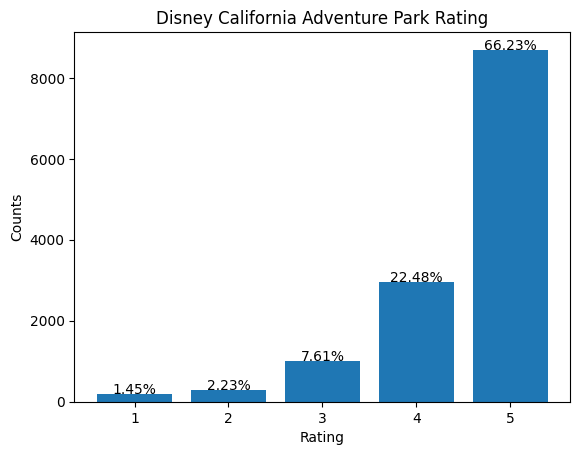

In [107]:
# Plotting in bars with percentage
Cal_total_rating = len(Cal_rate)
fig, ax = plt.subplots()
width = 0.8
rating_x = np.array([1,2,3,4,5])
Cal_bar = ax.bar(rating_x, Cal_rate_count, width=width)
ax.set_xlabel("Rating")
ax.set_ylabel("Counts")
ax.set_title("Disney California Adventure Park Rating")
for p in Cal_bar:
    height = p.get_height()
    height_percent = format((height)*100/Cal_total_rating, ".2f")
    ax.text(p.get_x()+ p.get_width() / 2, height+.10, "{}%".format(height_percent), ha="center")

#### 4.2 Disney California Adventure Park Reviewer Location

In [108]:
# Make a variable and check
Cal_location = Cal["Reviewer Location"]
Cal_location.head()

0      Philippines
1    United States
2              N/A
3      New Zealand
4              N/A
Name: Reviewer Location, dtype: object

In [109]:
# create list of everything
Cal_countries_list = Cal_location.tolist()
Cal_countries = unique(Cal_countries_list)
print(Cal_countries)

['Philippines', 'United States', 'N/A', 'New Zealand', 'United Kingdom', 'Canada', 'Belgium', 'Mexico', 'Italy', 'Brazil', 'Australia', 'Saudi Arabia', 'Singapore', 'Dominican Republic', 'China', 'Germany', 'Mongolia', 'Nigeria', 'Switzerland', 'India', 'Sweden', 'Israel', 'Netherlands', 'Malaysia', 'United Arab Emirates', 'Costa Rica', 'Ireland', 'Japan', 'Spain', 'Tanzania', 'Georgia', 'Romania', 'Taiwan', 'Poland', 'Indonesia', 'France', 'Ukraine', 'Finland', 'South Africa', 'Denmark', 'Bahrain', 'Norway', 'Croatia', 'Botswana', 'Peru', 'Vietnam', 'Czechia', 'Guatemala', 'Egypt', 'Colombia', 'Uruguay', 'Lebanon', 'Greece', 'Thailand', 'Rwanda', 'Cook Islands', 'Armenia', 'Qatar', 'Turkey', 'Panama', 'Azerbaijan', 'Chile', 'Vanuatu', 'Bosnia and Herzegovina', 'East Timor', 'Maldives', 'Russia', 'Kuwait', 'Pakistan', 'Sri Lanka', 'Cuba', 'Zambia', 'Honduras', 'Zimbabwe', 'Argentina', 'Jersey', 'Ghana', 'Jordan', 'Austria', 'Turks and Caicos Islands', 'Portugal', 'Kazakhstan', 'South K

In [110]:
Cal_countries_count = []
for i in Cal_countries:
    count = Cal_countries_list.count(i)
    Cal_countries_count.append(count)
print(Cal_countries_count)

[35, 7495, 1271, 342, 714, 1187, 6, 67, 19, 42, 1413, 10, 50, 3, 25, 13, 3, 4, 7, 66, 12, 15, 19, 15, 20, 6, 26, 13, 11, 1, 4, 5, 6, 2, 19, 16, 1, 7, 9, 11, 2, 7, 1, 1, 3, 3, 3, 6, 9, 6, 2, 1, 6, 10, 1, 1, 1, 2, 5, 4, 2, 8, 1, 1, 1, 1, 3, 4, 2, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 5, 1, 4, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]


In [111]:
Cal_df = pd.DataFrame({"Country": Cal_countries})
Cal_df["Count"] = Cal_countries_count
print(Cal_df)

           Country  Count
0      Philippines     35
1    United States   7495
2              N/A   1271
3      New Zealand    342
4   United Kingdom    714
..             ...    ...
91           Kenya      1
92           Sudan      1
93        Cambodia      1
94        Barbados      1
95    Vatican City      1

[96 rows x 2 columns]


In [112]:
# create a list to store country/continent code
Cal_code_list = []
for i in Cal_countries:
    code = get_continent(i)
    Cal_code_list.append(code)
print(Cal_code_list)

[('PH', 'AS'), ('US', 'NA'), ('Unknown', 'Unknown'), ('NZ', 'OC'), ('GB', 'EU'), ('CA', 'NA'), ('BE', 'EU'), ('MX', 'NA'), ('IT', 'EU'), ('BR', 'SA'), ('AU', 'OC'), ('SA', 'AS'), ('SG', 'AS'), ('DO', 'NA'), ('CN', 'AS'), ('DE', 'EU'), ('MN', 'AS'), ('NG', 'AF'), ('CH', 'EU'), ('IN', 'AS'), ('SE', 'EU'), ('IL', 'AS'), ('NL', 'EU'), ('MY', 'AS'), ('AE', 'AS'), ('CR', 'NA'), ('IE', 'EU'), ('JP', 'AS'), ('ES', 'EU'), ('TZ', 'AF'), ('GE', 'AS'), ('RO', 'EU'), ('TW', 'AS'), ('PL', 'EU'), ('ID', 'AS'), ('FR', 'EU'), ('UA', 'EU'), ('FI', 'EU'), ('ZA', 'AF'), ('DK', 'EU'), ('BH', 'AS'), ('NO', 'EU'), ('HR', 'EU'), ('BW', 'AF'), ('PE', 'SA'), ('VN', 'AS'), ('CZ', 'EU'), ('GT', 'NA'), ('EG', 'AF'), ('CO', 'SA'), ('UY', 'SA'), ('LB', 'AS'), ('GR', 'EU'), ('TH', 'AS'), ('RW', 'AF'), ('CK', 'OC'), ('AM', 'AS'), ('QA', 'AS'), ('TR', 'AS'), ('PA', 'NA'), ('AZ', 'AS'), ('CL', 'SA'), ('VU', 'OC'), ('BA', 'EU'), ('TL', 'Unknown'), ('MV', 'AS'), ('RU', 'EU'), ('KW', 'AS'), ('PK', 'AS'), ('LK', 'AS'), ('CU

In [113]:
# Add to df
Cal_df["codes"] = Cal_code_list
Cal_df.head()

,Country,Count,codes
0,Philippines,35,"(PH, AS)"
1,United States,7495,"(US, NA)"
2,N/A,1271,"(Unknown, Unknown)"
3,New Zealand,342,"(NZ, OC)"
4,United Kingdom,714,"(GB, EU)"


In [114]:
# create list for latitude and longitude
Cal_lat = []
Cal_long = []
for i in Cal_countries:
    lat, long = geolocate(i)
    Cal_lat.append(lat)
    Cal_long.append(long)
print(Cal_lat)
print(Cal_long)

[12.7503486, 39.7837304, 41.45630775, -41.5000831, 54.7023545, 61.0666922, 50.6402809, 23.6585116, 42.6384261, -10.3333333, -24.7761086, 25.6242618, 1.357107, 19.0974031, 35.000074, 51.1638175, 46.8250388, 9.6000359, 46.7985624, 22.3511148, 59.6749712, 30.8124247, 52.2434979, 4.5693754, 24.0002488, 10.2735633, 52.865196, 36.5748441, 39.3260685, -6.5247123, 32.3293809, 45.9852129, 23.9739374, 52.215933, -2.4833826, 46.603354, 49.4871968, 63.2467777, -28.8166236, 55.670249, 26.1551249, 60.5000209, 45.5643442, -23.1681782, -6.8699697, 15.9266657, 49.7439047, 15.5855545, 26.2540493, 4.099917, -32.8755548, 33.8750629, 38.9953683, 14.8971921, -1.9646631, -19.919672900000002, 40.7696272, 25.3336984, 38.9597594, 8.559559, 40.3936294, -31.7613365, -16.5255069, 44.3053476, -8.5151979, 3.7203503, 64.6863136, 29.2733964, 30.3308401, 7.5554942, 23.0131338, -14.5189121, 15.2572432, -18.4554963, -34.9964963, 49.2214561, 8.0300284, 31.1667049, 47.59397, 21.721746, 39.6621648, 48.1012954, 36.638392, 47

In [115]:
# add to df
Cal_df["Latitude"] = Cal_lat
Cal_df["Longitude"] = Cal_long
Cal_df.head(50)

,Country,Count,codes,Latitude,Longitude
0,Philippines,35,"(PH, AS)",12.750349,122.731210
1,United States,7495,"(US, NA)",39.783730,-100.445882
2,N/A,1271,"(Unknown, Unknown)",41.456308,-7.538746
3,New Zealand,342,"(NZ, OC)",-41.500083,172.834408
4,United Kingdom,714,"(GB, EU)",54.702354,-3.276575
5,Canada,1187,"(CA, NA)",61.066692,-107.991707
6,Belgium,6,"(BE, EU)",50.640281,4.666715
7,Mexico,67,"(MX, NA)",23.658512,-102.007710
8,Italy,19,"(IT, EU)",42.638426,12.674297
9,Brazil,42,"(BR, SA)",-10.333333,-53.200000


In [116]:
Cal_df.iloc[2, Cal_df.columns.get_loc("Latitude")] = 0
Cal_df.iloc[2, Cal_df.columns.get_loc("Longitude")] = 0
Cal_df.head()

,Country,Count,codes,Latitude,Longitude
0,Philippines,35,"(PH, AS)",12.750349,122.731210
1,United States,7495,"(US, NA)",39.783730,-100.445882
2,N/A,1271,"(Unknown, Unknown)",0.000000,0.000000
3,New Zealand,342,"(NZ, OC)",-41.500083,172.834408
4,United Kingdom,714,"(GB, EU)",54.702354,-3.276575


In [117]:
# create world map
Cal_world_map = folium.Map(titles = "cartodbpositron")
Cal_marker_cluster = MarkerCluster().add_to(Cal_world_map)
for i in range(len(Cal_df)):
    lat = Cal_df.iloc[i]["Latitude"]
    long = Cal_df.iloc[i]["Longitude"]
    radius = 10
    popup_text = """Country: {}<br>Count: {}<br>"""
    popup_text = popup_text.format(Cal_df.iloc[i]["Country"], Cal_df.iloc[i]["Count"])
    folium.CircleMarker(location = [lat, long], radius = radius, popup = popup_text, fill = True).add_to(Cal_marker_cluster)

In [137]:
Cal_world_map

### 5. Shanghai Disneyland

In [119]:
# import csv file and show if it's looking good
# keep_default_na=False is included as N/A values will be read as NaN if not
SH = pd.read_csv("Disneyland_Shanghai_Reviews.csv", keep_default_na=False)
SH.head()

,Review #,Rating,Year/Month,Reviewer Location,Review Title,Review Text
0,1,5,21-May,United Kingdom,Best Disneyland I’ve been to! (So far),Best Disneyland I have been to! (So far…) I ha...
1,2,3,21-Jun,Canada,Go to Disney somewhere else,After experiencing Disney World in Florida and...
2,3,5,21-Dec,China,Christmas magic,A pretty magical place. Rides were amazing and...
3,4,4,21-Dec,United States,Disney is always a happy place!,Lovely visit. Not many exciting rides but nice...
4,5,5,21-Dec,China,Magical,What an amazing magical place especially for C...


#### 5.1 Shanghai Disneyland Ratings

In [120]:
# save rating as a separate variable and check
SH_rate = SH["Rating"]
SH_rate.head()
print(type(SH_rate[1000]))

<class 'numpy.int64'>


In [121]:
for i in range (len(SH)):
    location = SH["Rating"][i]
    location = int(float(location))
    SH.loc[i, "Rating"] = location
SH.to_csv("Disneyland_Shanghai_Reviews.csv", index = False)

In [123]:
# check if the values are converted into ints
SH_rate = SH["Rating"]
print(type(SH_rate[1000]))

<class 'numpy.int64'>


In [124]:
# Create an array that holds the count of each rating
SH_rate_count = np.array([])
print("Original:",SH_rate_count)
for i in range(1,6):
    count = SH_rate.value_counts()[i]
    SH_rate_count = np.append(SH_rate_count, np.array([count]))
print("Now:",SH_rate_count)

Original: []
Now: [111.  91. 201. 437. 570.]


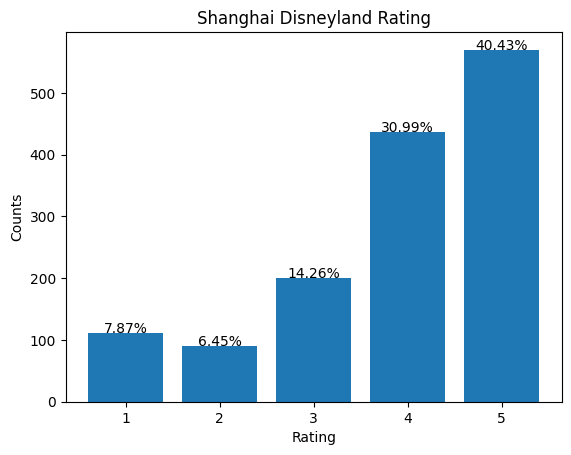

In [125]:
# Plotting in bars with percentage
SH_total_rating = len(SH_rate)
fig, ax = plt.subplots()
width = 0.8
rating_x = np.array([1,2,3,4,5])
SH_bar = ax.bar(rating_x, SH_rate_count, width=width)
ax.set_xlabel("Rating")
ax.set_ylabel("Counts")
ax.set_title("Shanghai Disneyland Rating")
for p in SH_bar:
    height = p.get_height()
    height_percent = format((height)*100/SH_total_rating, ".2f")
    ax.text(p.get_x()+ p.get_width() / 2, height+.10, "{}%".format(height_percent), ha="center")

#### 5.2 Shanghai Disneyland Reviewer Location

In [126]:
# Make a variable and check
SH_location = SH["Reviewer Location"]
SH_location.head()

0    United Kingdom
1            Canada
2             China
3     United States
4             China
Name: Reviewer Location, dtype: object

In [127]:
# create list of everything
SH_countries_list = SH_location.tolist()
SH_countries = unique(SH_countries_list)
print(SH_countries)

['United Kingdom', 'Canada', 'China', 'United States', 'N/A', 'Austria', 'Thailand', 'South Korea', 'Australia', 'Singapore', 'Philippines', 'Mexico', 'Indonesia', 'India', 'Malaysia', 'South Africa', 'New Zealand', 'Iran', 'Israel', 'Senegal', 'Ecuador', 'Argentina', 'Vietnam', 'France', 'Italy', 'United Arab Emirates', 'Sweden', 'Vatican City', 'Taiwan', 'Spain', 'Kenya', 'Romania', 'Trinidad and Tobago', 'Brunei', 'Kosovo', 'Russia', 'Norway', 'Pakistan', 'Cyprus', 'Bangladesh', 'Sri Lanka', 'Chile', 'Denmark', 'Malta', 'Netherlands', 'Lebanon', 'Czechia', 'Germany', 'Japan', 'Finland', 'Brazil', 'Qatar', 'Poland', 'Ireland', 'Nepal', 'Kuwait', 'Switzerland', 'Uganda', 'Turkey', 'Paraguay', 'Laos', 'Zimbabwe', 'Peru', 'Mauritius', 'Croatia', 'Hungary', 'Greece', 'Oman', 'Ethiopia', 'Colombia', 'Cambodia', 'Fiji']


In [128]:
SH_countries_count = []
for i in SH_countries:
    count = SH_countries_list.count(i)
    SH_countries_count.append(count)
print(SH_countries_count)

[118, 42, 154, 275, 204, 3, 16, 5, 134, 100, 21, 12, 42, 37, 55, 13, 18, 10, 10, 1, 1, 4, 7, 5, 4, 9, 9, 1, 2, 3, 1, 1, 1, 3, 1, 7, 1, 3, 2, 1, 3, 3, 2, 1, 7, 1, 1, 5, 7, 6, 3, 3, 3, 4, 2, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1]


In [129]:
SH_df = pd.DataFrame({"Country": SH_countries})
SH_df["Count"] = SH_countries_count
print(SH_df)

           Country  Count
0   United Kingdom    118
1           Canada     42
2            China    154
3    United States    275
4              N/A    204
..             ...    ...
67            Oman      1
68        Ethiopia      1
69        Colombia      2
70        Cambodia      1
71            Fiji      1

[72 rows x 2 columns]


In [130]:
# create a list to store country/continent code
SH_code_list = []
for i in SH_countries:
    code = get_continent(i)
    SH_code_list.append(code)
print(SH_code_list)

[('GB', 'EU'), ('CA', 'NA'), ('CN', 'AS'), ('US', 'NA'), ('Unknown', 'Unknown'), ('AT', 'EU'), ('TH', 'AS'), ('KR', 'AS'), ('AU', 'OC'), ('SG', 'AS'), ('PH', 'AS'), ('MX', 'NA'), ('ID', 'AS'), ('IN', 'AS'), ('MY', 'AS'), ('ZA', 'AF'), ('NZ', 'OC'), ('IR', 'AS'), ('IL', 'AS'), ('SN', 'AF'), ('EC', 'SA'), ('AR', 'SA'), ('VN', 'AS'), ('FR', 'EU'), ('IT', 'EU'), ('AE', 'AS'), ('SE', 'EU'), ('Unknown', 'Unknown'), ('TW', 'AS'), ('ES', 'EU'), ('KE', 'AF'), ('RO', 'EU'), ('TT', 'NA'), ('BN', 'AS'), ('Unknown', 'Unknown'), ('RU', 'EU'), ('NO', 'EU'), ('PK', 'AS'), ('CY', 'AS'), ('BD', 'AS'), ('LK', 'AS'), ('CL', 'SA'), ('DK', 'EU'), ('MT', 'EU'), ('NL', 'EU'), ('LB', 'AS'), ('CZ', 'EU'), ('DE', 'EU'), ('JP', 'AS'), ('FI', 'EU'), ('BR', 'SA'), ('QA', 'AS'), ('PL', 'EU'), ('IE', 'EU'), ('NP', 'AS'), ('KW', 'AS'), ('CH', 'EU'), ('UG', 'AF'), ('TR', 'AS'), ('PY', 'SA'), ('LA', 'AS'), ('ZW', 'AF'), ('PE', 'SA'), ('MU', 'AF'), ('HR', 'EU'), ('HU', 'EU'), ('GR', 'EU'), ('OM', 'AS'), ('ET', 'AF'), ('C

In [131]:
# Add to df
SH_df["codes"] = SH_code_list
SH_df.head()

,Country,Count,codes
0,United Kingdom,118,"(GB, EU)"
1,Canada,42,"(CA, NA)"
2,China,154,"(CN, AS)"
3,United States,275,"(US, NA)"
4,N/A,204,"(Unknown, Unknown)"


In [132]:
# create list for latitude and longitude
SH_lat = []
SH_long = []
for i in SH_countries:
    lat, long = geolocate(i)
    SH_lat.append(lat)
    SH_long.append(long)
print(SH_lat)
print(SH_long)

[54.7023545, 61.0666922, 35.000074, 39.7837304, 41.45630775, 47.59397, 14.8971921, 36.638392, -24.7761086, 1.357107, 12.7503486, 23.6585116, -2.4833826, 22.3511148, 4.5693754, -28.8166236, -41.5000831, 32.6475314, 30.8124247, 14.4750607, -1.3397668, -34.9964963, 15.9266657, 46.603354, 42.6384261, 24.0002488, 59.6749712, 41.903411, 23.9739374, 39.3260685, 1.4419683, 45.9852129, 10.7466905, 4.4137155, 42.5869578, 64.6863136, 60.5000209, 30.3308401, 34.9823018, 24.4769288, 7.5554942, -31.7613365, 55.670249, 35.8885993, 52.2434979, 33.8750629, 49.7439047, 51.1638175, 36.5748441, 63.2467777, -10.3333333, 25.3336984, 52.215933, 52.865196, 28.1083929, 29.2733964, 46.7985624, 1.5333554, 38.9597594, -23.3165935, 20.0171109, -18.4554963, -6.8699697, -20.2759451, 45.5643442, 47.1817585, 38.9953683, 21.0000287, 10.2116702, 4.099917, 12.5433216, -18.1239696]
[-3.2765753, -107.991707, 104.999927, -100.445882, -7.538745693488435, 14.12456, 100.83273, 127.6961188, 134.755, 103.8194992, 122.7312101, -1

In [133]:
# add to df
SH_df["Latitude"] = SH_lat
SH_df["Longitude"] = SH_long
SH_df.head(50)

,Country,Count,codes,Latitude,Longitude
0,United Kingdom,118,"(GB, EU)",54.702354,-3.276575
1,Canada,42,"(CA, NA)",61.066692,-107.991707
2,China,154,"(CN, AS)",35.000074,104.999927
3,United States,275,"(US, NA)",39.783730,-100.445882
4,N/A,204,"(Unknown, Unknown)",41.456308,-7.538746
5,Austria,3,"(AT, EU)",47.593970,14.124560
6,Thailand,16,"(TH, AS)",14.897192,100.832730
7,South Korea,5,"(KR, AS)",36.638392,127.696119
8,Australia,134,"(AU, OC)",-24.776109,134.755000
9,Singapore,100,"(SG, AS)",1.357107,103.819499


In [134]:
SH_df.iloc[4, SH_df.columns.get_loc("Latitude")] = 0
SH_df.iloc[4, SH_df.columns.get_loc("Longitude")] = 0
SH_df.head()

,Country,Count,codes,Latitude,Longitude
0,United Kingdom,118,"(GB, EU)",54.702354,-3.276575
1,Canada,42,"(CA, NA)",61.066692,-107.991707
2,China,154,"(CN, AS)",35.000074,104.999927
3,United States,275,"(US, NA)",39.783730,-100.445882
4,N/A,204,"(Unknown, Unknown)",0.000000,0.000000


In [135]:
# create world map
SH_world_map = folium.Map(titles = "cartodbpositron")
SH_marker_cluster = MarkerCluster().add_to(SH_world_map)
for i in range(len(SH_df)):
    lat = SH_df.iloc[i]["Latitude"]
    long = SH_df.iloc[i]["Longitude"]
    radius = 10
    popup_text = """Country: {}<br>Count: {}<br>"""
    popup_text = popup_text.format(SH_df.iloc[i]["Country"], SH_df.iloc[i]["Count"])
    folium.CircleMarker(location = [lat, long], radius = radius, popup = popup_text, fill = True).add_to(SH_marker_cluster)

In [136]:
SH_world_map

# Limitations
- could be better ways of coding
- could draw map in another way
- could include data such as average rating by continent, etc
- country codes were generated but not really necessary